  data transformation and visualisation


In [1]:
# importing important libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Digital alpha/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')  # ZHVI indexed dataset

In [3]:
data.head()

# by exploring the dataset it is clear that the dataset is talking about the month on month house price ZHVI index values
# at diiferent cities , how the house prices are increasing or decreasing w.r.t the passing of time.

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,130287.519134,130986.454069,...,624591.374167,632503.861776,639719.068154,644183.951334,645330.342375,642250.704367,639868.002388,636974.535334,632470.800784,629516.303341
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,205857.114461,206148.139291,...,899748.915585,908394.728386,913205.457773,915884.082386,913542.541439,909121.015865,904309.731512,901908.970409,898585.043168,890194.164509
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,95018.228813,94992.795115,...,247356.386226,251261.832612,254553.486054,256833.443059,257899.901884,258099.225384,258069.554808,258056.821868,257327.171539,255921.337783
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,120726.865760,120760.601509,...,285561.872355,286410.068889,286004.342441,284177.554780,281938.192950,279279.406615,277176.870186,276207.507874,275203.052968,276299.085040
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,94902.736943,94991.755467,...,250469.248807,254742.935336,258344.545768,260608.054991,261427.814664,261084.425131,260555.370376,260019.474525,258902.543330,257774.984016


# data exploration and transformation


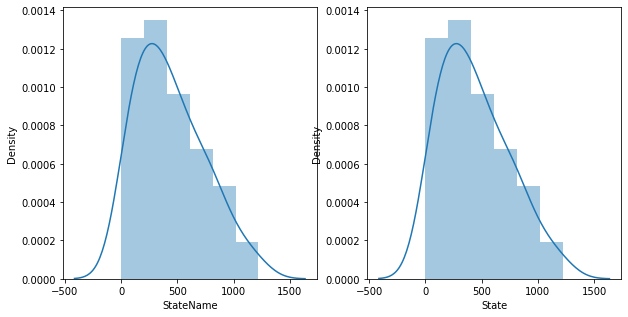

In [4]:
# distribution of values plot for columns 'StateName' and 'State'

fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(data['StateName'].value_counts(),ax =ax[0])

sns.distplot(data['State'].value_counts(),ax = ax[1])


plt.show()

In [5]:
# 1) dimentionality reduction : since we have a many numbers of dimensions in this dataset
#    so i will remove some dimensions from which i guess does not have much importance 
#    since we already know this dataset is based on cities only, so having the column name as 'RegionType' makes no relevance.
#    'StateName' and 'State' columns share the exactly same values(see above distribution plots), so keeping only one column will we enough.



def dimension_reduction(col):

    return data.drop(col,axis =1)

data = dimension_reduction(['RegionType','StateName'])


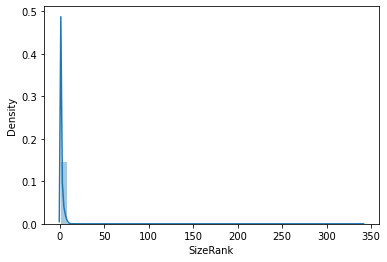

In [41]:
sns.distplot(data['SizeRank'].value_counts())  # value counts for sizerank column
plt.show()

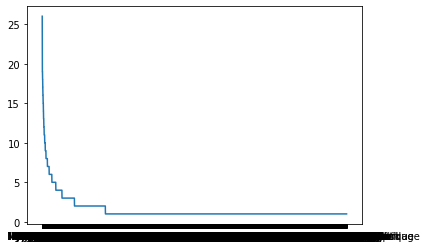

In [42]:
plt.plot(data['RegionName'].value_counts()  )    # this value count plot suggests that the we have some region names with multiple cities in it.

plt.show()

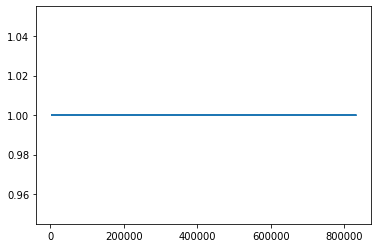

In [35]:
# value counts for RegionID 

plt.plot(data['RegionID'].value_counts())
       
# from result, we got indivisual value of each regionid which we can take as a key to check the trend of house prices ZHVI index

In [9]:
# 2) playing with missing values 

# first we will check the missing values in categorical data features, it would be easy for further proceding.

def missing_values(col):
  
  return (data[col].isnull().sum())



columns = ['Metro','SizeRank','RegionName','CountyName','State']
for i in columns:

    print(f'missing values in {i} is : ',missing_values(i))

missing values in Metro is :  4847
missing values in SizeRank is :  0
missing values in RegionName is :  0
missing values in CountyName is :  0
missing values in State is :  0


In [10]:
# the metro plays an important role in the house prices of cities, 
# so i am going to change the multiple categorical values to binary category, 1 for city having metro and 0 for not having metro 

data['Metro'] = data['Metro'].where(data['Metro'].isnull(), 1, inplace=False) # changed the non null values to 1, for having a metro

data['Metro'].fillna(0,inplace =True)    # value 0 means city doesnot have metro 

In [11]:
print(data['Metro'].isnull().sum()) # now all the null values are removed from metro column

0


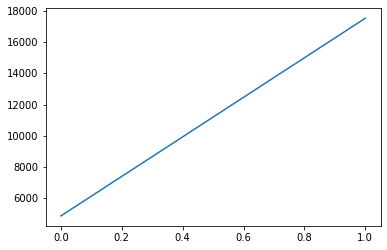

In [34]:
plt.plot(data['Metro'].value_counts())  # see from the graph below we are only having 0 and 1 values.

In [13]:
data.describe()

,RegionID,SizeRank,Metro,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
count,22390.000000,22390.000000,22390.000000,8.843000e+03,8.894000e+03,8.912000e+03,8.930000e+03,8.983000e+03,8.996000e+03,9.023000e+03,...,2.136000e+04,2.135900e+04,2.135900e+04,2.136100e+04,2.136100e+04,2.136100e+04,2.136000e+04,2.136000e+04,2.135800e+04,2.237200e+04
mean,55572.586467,12529.858866,0.783519,1.408103e+05,1.408986e+05,1.411457e+05,1.419259e+05,1.427703e+05,1.437065e+05,1.448372e+05,...,2.945084e+05,2.988437e+05,3.023070e+05,3.038124e+05,3.035426e+05,3.018511e+05,3.004785e+05,2.995209e+05,2.985542e+05,2.950993e+05
std,109062.369565,7951.386624,0.411855,1.074339e+05,1.077052e+05,1.082348e+05,1.094710e+05,1.107384e+05,1.122807e+05,1.138602e+05,...,3.001605e+05,3.057908e+05,3.094475e+05,3.103742e+05,3.089033e+05,3.057281e+05,3.030248e+05,3.015624e+05,3.003327e+05,2.944558e+05
min,3300.000000,0.000000,0.000000,3.243672e+03,3.240064e+03,3.233232e+03,3.226388e+03,3.215605e+03,3.200860e+03,3.202919e+03,...,2.746136e+04,2.821023e+04,2.694200e+04,2.648654e+04,2.636644e+04,2.661641e+04,2.606558e+04,2.507902e+04,2.374617e+04,2.392334e+04
25%,17568.250000,5737.250000,1.000000,7.678971e+04,7.682559e+04,7.686324e+04,7.708882e+04,7.749654e+04,7.780510e+04,7.813280e+04,...,1.448121e+05,1.464456e+05,1.479775e+05,1.489556e+05,1.492133e+05,1.487277e+05,1.483177e+05,1.479700e+05,1.476904e+05,1.468334e+05
50%,31991.000000,11697.500000,1.000000,1.173309e+05,1.170893e+05,1.172695e+05,1.177996e+05,1.182827e+05,1.187592e+05,1.192664e+05,...,2.192682e+05,2.221832e+05,2.249927e+05,2.263839e+05,2.268239e+05,2.261131e+05,2.255779e+05,2.249421e+05,2.246631e+05,2.229125e+05
75%,46820.250000,18882.000000,1.000000,1.714256e+05,1.713933e+05,1.715438e+05,1.721859e+05,1.731905e+05,1.743337e+05,1.754979e+05,...,3.470683e+05,3.522064e+05,3.565686e+05,3.585656e+05,3.586675e+05,3.569692e+05,3.558011e+05,3.550045e+05,3.535716e+05,3.501302e+05
max,832069.000000,28439.000000,1.000000,1.854760e+06,1.869786e+06,1.892236e+06,1.939675e+06,1.998294e+06,2.065612e+06,2.133827e+06,...,8.781826e+06,9.065268e+06,9.297991e+06,9.419891e+06,9.448384e+06,9.414435e+06,9.331875e+06,9.280837e+06,9.167373e+06,9.068339e+06


<AxesSubplot:ylabel='Density'>

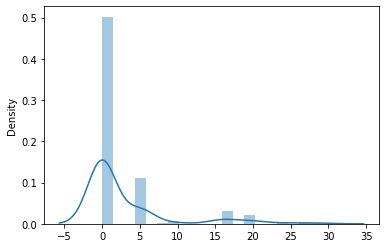

In [40]:
sns.distplot(data.isnull().sum())   # null values distribution in data
plt.show()

In [15]:
data.isnull().sum().sum()

RegionID         0
SizeRank         0
RegionName       0
State            0
Metro            0
              ... 
2022-09-30    1029
2022-10-31    1030
2022-11-30    1030
2022-12-31    1032
2023-01-31      18
Length: 283, dtype: int64

In [16]:
# since we have a lot of missing values in numerical features so we will try to fill those missing values with backfilling and front filling method.

data =data.fillna(value=None, method='backfill', axis=None,limit = 15,  downcast=None)

data = data.fillna(value=None, method='ffill', axis=None,limit = 15,  downcast=None)

In [18]:
data.isnull().sum().sum()

784

In [19]:
col_list = list(data.columns)
col_list = col_list[6:]

date_time_normal = []
for i in col_list:

    x = datetime.strptime(i,'%Y-%m-%d')
    x = x.strftime('%Y%m%d')
    date_time_normal.append(x)


  # we can take the all datetime column as a list and make the values in integer form and can use as index for the graph plotting,although we don't need it much.

total values : 2

Enter the numbers : 6181 12447


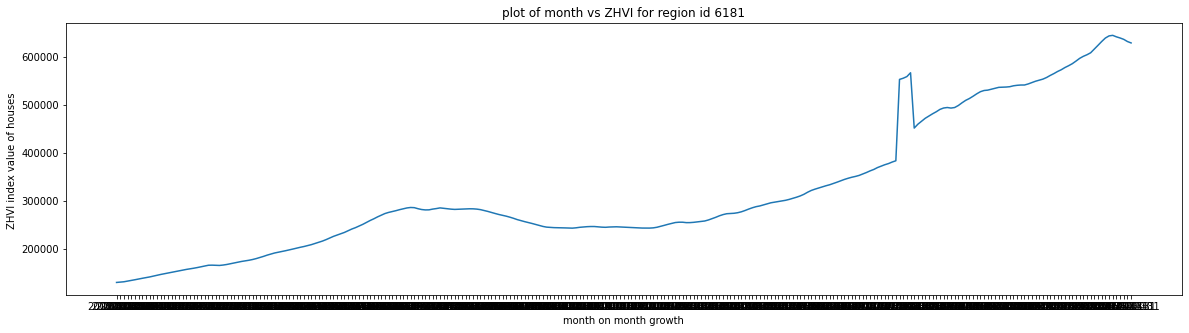

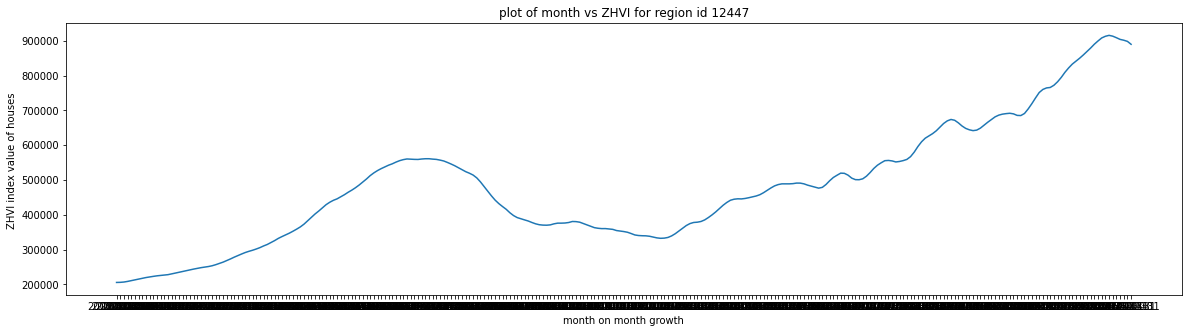

In [51]:
#                  visualisation of ZHVI index values trend for the particular region,we can take the region id input from the user side 

#                  user visualisation by entering the region id


# taking input from user and showing them the graph variation

n = int(input('total values : '))
user_side = list(map(int,input("\nEnter the numbers : ").strip().split()))[:n]
#user_side = list(user_side)
for i in user_side:
    id = data[data['RegionID'] == i]    # let 6181 is the id entered by user
    id = id.iloc[0,6:]
    plt.subplots(figsize=(20,5))   # this size is choosen so that graph can be seen clearly.
    plt.plot(id)
    plt.xlabel('month on month growth')
    plt.ylabel('ZHVI index value of houses ')
    plt.title(f'plot of month vs ZHVI for region id {i}')
    plt.show()